1. 패키지 및 데이터 불러오기
2. EDA
3. 전처리 및 피쳐엔지니어링 
4. 예측
5. 제출

1. PKG 및 데이터 불러오기

In [2]:
# 패키지 불러오기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
train=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/Data/캐글 노하우/Instant Gratification/train.csv")
test=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/Data/캐글 노하우/Instant Gratification/test.csv")
submission=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/Data/캐글 노하우/Instant Gratification/sample_submission.csv")

2.EDA

In [4]:
# shape 찍어보기 test 데이터 셋이 칼럼이 1개 적음
print(train.shape)
print(test.shape)

(262144, 258)
(131072, 257)


In [5]:
# 타겟 데이터의 비율을 보니 0과 1이 반반 정도 수준임
print(train["target"].value_counts())

target
1    131131
0    131013
Name: count, dtype: int64


In [6]:
train["target"].cumsum()

0              0
1              0
2              1
3              1
4              1
           ...  
262139    131130
262140    131131
262141    131131
262142    131131
262143    131131
Name: target, Length: 262144, dtype: int64

<Axes: >

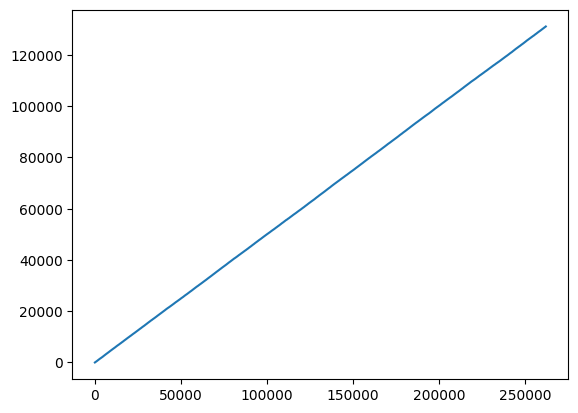

In [7]:
# 누적합에 대한 플롯을 그려보니 그냥 일정하게 증가함(특정 부분에 1이 많다거나 그렇지 않음)
train["target"].cumsum().plot()

In [8]:
# 널값에 대한 확인을 함 섬 한번이면 칼럼별 널값 두번하니 전체 널값이 계산됨 
# 근데 널값이 없음
train.isnull().sum().sum()

0

In [9]:
# 데이터 타입을 확인
train.dtypes.value_counts()

float64    255
int64        2
object       1
Name: count, dtype: int64

In [10]:
train.select_dtypes(include=["object","int64"]).head()
# 트레인 데이터 셋에서 인트와 오브젝트가 숫자가 적으니 먼저 봄

,id,wheezy-copper-turtle-magic,target
0,707b395ecdcbb4dc2eabea00e4d1b179,99,0
1,5880c03c6582a7b42248668e56b4bdec,52,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,230,1
3,e350f17a357f12a1941f0837afb7eb8d,78,0
4,a8f910ea6075b6376af079055965ff68,497,0


In [11]:
# 전체 칼럼에서 중복되지 않은 값의 갯수를 확인
# 근데 나중에 또 쓸라고 train_columns라는 칼럼이 들어있는 리스트를 만듬
train_columns=[c for c in train.columns if c not in ["id","target"]]
train[train_columns].nunique()

muggy-smalt-axolotl-pembus              254322
dorky-peach-sheepdog-ordinal            254588
slimy-seashell-cassowary-goose          254356
snazzy-harlequin-chicken-distraction    254576
frumpy-smalt-mau-ordinal                254330
                                         ...  
jumpy-thistle-discus-sorted             254261
muggy-turquoise-donkey-important        254366
blurry-buff-hyena-entropy               254345
bluesy-chocolate-kudu-fepid             254329
gamy-white-monster-expert               254192
Length: 256, dtype: int64

In [12]:
print(np.where(train[train_columns].nunique()<25000))
# 겉보기에는 다 25000개 이상인거 같은데 실제로 그런지 확인
# where을 쓰면 조건을 만족하는 칼럼의 인덱스를 반환함

(array([146], dtype=int64),)


In [13]:
print(train_columns[146])
# 인덱스를 다시 넣어서 칼럼명을 확인

wheezy-copper-turtle-magic


In [14]:
print(train["wheezy-copper-turtle-magic"].nunique())
# 고유값을 확인해보니 512개임

512


In [15]:
train["wheezy-copper-turtle-magic"].dtypes

dtype('int64')

In [16]:
train["wheezy-copper-turtle-magic"].value_counts()

wheezy-copper-turtle-magic
51     570
489    556
298    554
135    554
245    553
      ... 
277    476
215    475
108    472
42     471
185    442
Name: count, Length: 512, dtype: int64

In [17]:
print(train["wheezy-copper-turtle-magic"].value_counts().mean())
# 이상한 칼럼의 평균값을 계산해보니 512가 나옴 
# 그 말은 512개가 서로 비슷한 갯수끼리 있으니 평균이 512로 나온다는 뜻임

512.0


In [18]:
print(train["wheezy-copper-turtle-magic"].value_counts().rename_axis("wheezy-copper-turtle-magic").reset_index(name="counts"))
# 종류 별로 몇개있는지를 세는 것임

     wheezy-copper-turtle-magic  counts
0                            51     570
1                           489     556
2                           298     554
3                           135     554
4                           245     553
..                          ...     ...
507                         277     476
508                         215     475
509                         108     472
510                          42     471
511                         185     442

[512 rows x 2 columns]


In [19]:
train_columns=[c for c in train.columns if c not in ["id","target","wheezy-copper-turtle-magic"]]
# 재사용하기 위해서 위의 3개의 칼럼명이 없는 리스트를 만들고
# 

In [20]:
describe_train=train[train_columns].describe().T.drop("count",axis=1)
# 위에 있는 칼럼들 빼고 디스크라이브를 한다음에 전치해서 count 칼럼을 제외함(왜?)

In [21]:
cmap=sns.diverging_palette(5,250,as_cmap=True)
# 컬러맵을 만들어두고

In [27]:
describe_train.T.style.background_gradient(cmap,axis=1)
# 표에 색을 넣어서 확인

In [29]:
train_colums=[c for c in train.columns if c not in ["id","target"]]
target_0_df=train.loc[train["target"]==0]
target_1_df=train.loc[train["target"]==1]

AttributeError: module 'matplotlib.pyplot' has no attribute 'distplot'

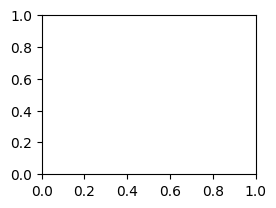

In [32]:
plt.figure(figsize=(16,12))
for index,name in enumerate(train_columns[:25]):
    plt.subplot(5,5,index+1)
    plt.distplot(target_0_df[name])
    plt.distplot(target_1_df[name])
    plt.title(name)
    plt.xlabel("")
    plt.legend(["0","1"])

plt.tight_layout()
plt.show()